In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df.to_numpy()

In [ ]:
from tensorflow.keras.models import load_model




In [ ]:
data = tf.keras.datasets.fashion_mnist
(train_images,train_labels), (test_images, test_label) = data.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
type(train_images)

numpy.ndarray

In [ ]:
 class_names = ['T-shirt',
               'Trouser',
               'Pullover',
               'Dress',
               'Coat',
               'Sandal',
               'Shirt',
               'Sneaker',
               'Bag',
               'Boot']

In [ ]:
def plot(train_images, train_labels):
  print("the pixel values range from:", np.min(train_images), "to", np.max(train_images))
  plt.figure(figsize=(17,8))
  for i in range(16):
    plt.subplot(4,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
  plt.show()

the pixel values range from: 0 to 255


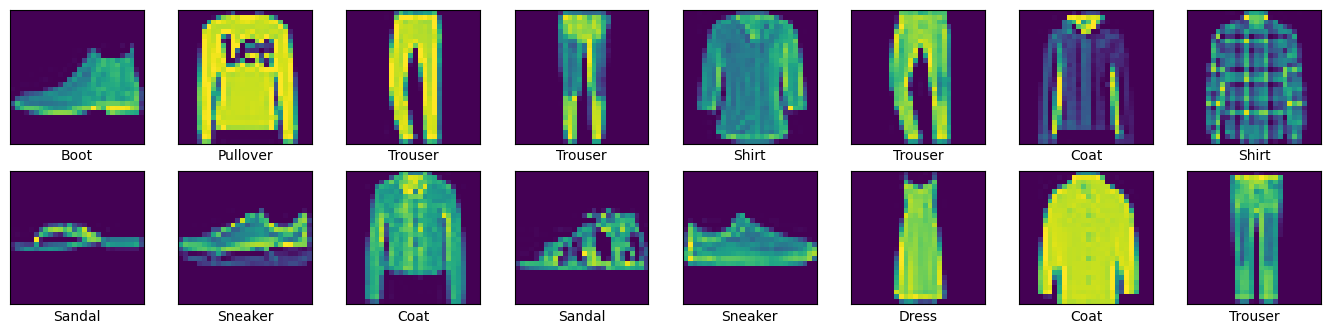

In [ ]:
plot(test_images, test_label)

## Nomalization

the pixel values range from: 0 to 255


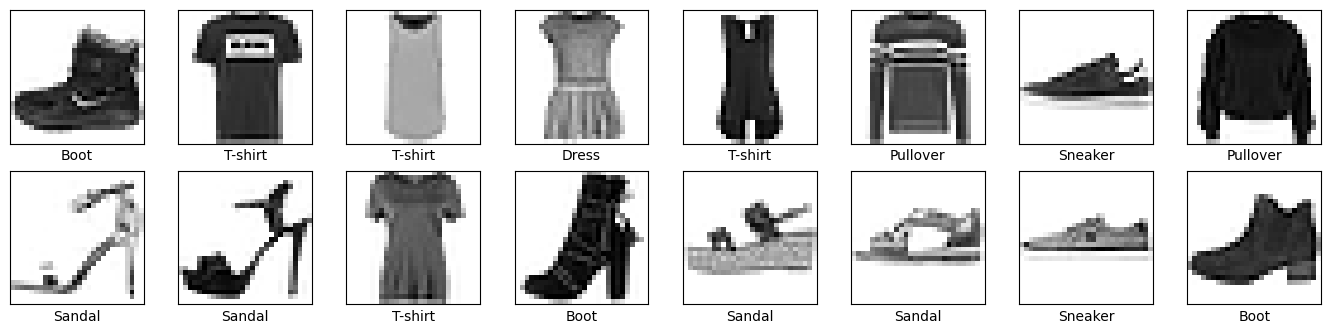

In [ ]:
train_images_normal = train_images / 255.0
test_images_normal = test_images / 255.0


print("the pixel values range from:", np.min(train_images), "to", np.max(train_images))
plt.figure(figsize=(17,8))
for i in range(16):
  plt.subplot(4,8,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_images_normal, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4943 - accuracy: 0.8282
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3715 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3349 - accuracy: 0.8781
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3110 - accuracy: 0.8864
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2933 - accuracy: 0.8922
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2806 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2669 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2577 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2486 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2

## Evaluate Model

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_label, verbose=2)

print('Test accuracy:', round(test_acc*100), '%')

313/313 - 1s - loss: 77.0655 - accuracy: 0.8492 - 845ms/epoch - 3ms/step
Test accuracy: 85 %


## Save model


In [ ]:
model.save('my_model')

In [ ]:
re = load_model("my_model")